In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import random_split,DataLoader
import matplotlib.pyplot as plt


In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

training_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/',train = True,transform=transform,download=False)

train_size = int(0.8*len(training_data))
val_size = len(training_data)-train_size

train_data,val_data=random_split(training_data,[train_size,val_size])

train_load = DataLoader(train_data,batch_size=128,shuffle=True)
val_load = DataLoader(val_data,batch_size=128,shuffle=False)

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(32*13*13,150)
        self.fc2 = nn.Linear(150,10)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1,32*13*13)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
        

In [11]:
optimizers = {
    "SGD" : lambda params:optim.SGD(params, lr = 0.001),
    "SGD + momentum" : lambda params:optim.SGD(params, lr=0.001,momentum = 0.4),
    "RMSprop" : lambda params:optim.RMSprop(params, lr=0.001),
    "Adagrad" : lambda params:optim.Adagrad(params, lr=0.001),
    "Adam" : lambda params:optim.Adam(params,lr=0.001,weight_decay=1e-4)
}
loss_fn = nn.CrossEntropyLoss()

In [12]:
loss_fn = nn.CrossEntropyLoss()
epochs = 20
results = {}

for name, optimizer_fn in optimizers.items():
    model = CNN()
    print(f"Training with {name}...")
    optimizer = optimizer_fn(model.parameters())
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()  
        epoch_train_loss = 0.0
        
        for images, labels in train_load:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        
        train_losses.append(epoch_train_loss / len(train_load))
        
        model.eval()  
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for images, labels in val_load:
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                epoch_val_loss += loss.item()
        
        val_losses.append(epoch_val_loss / len(val_load))
        print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")
    
    results[name] = (train_losses, val_losses)


Training with SGD...
Epoch 1/20 - Train Loss: 1.9577 - Val Loss: 1.6124
Epoch 2/20 - Train Loss: 1.4405 - Val Loss: 1.1931
Epoch 3/20 - Train Loss: 1.1676 - Val Loss: 0.9806
Epoch 4/20 - Train Loss: 1.0145 - Val Loss: 0.8630
Epoch 5/20 - Train Loss: 0.9238 - Val Loss: 0.7909
Epoch 6/20 - Train Loss: 0.8608 - Val Loss: 0.7432
Epoch 7/20 - Train Loss: 0.8143 - Val Loss: 0.7079
Epoch 8/20 - Train Loss: 0.7801 - Val Loss: 0.6821
Epoch 9/20 - Train Loss: 0.7507 - Val Loss: 0.6601
Epoch 10/20 - Train Loss: 0.7278 - Val Loss: 0.6416
Epoch 11/20 - Train Loss: 0.7084 - Val Loss: 0.6273
Epoch 12/20 - Train Loss: 0.6891 - Val Loss: 0.6137
Epoch 13/20 - Train Loss: 0.6736 - Val Loss: 0.6010
Epoch 14/20 - Train Loss: 0.6621 - Val Loss: 0.5908
Epoch 15/20 - Train Loss: 0.6477 - Val Loss: 0.5799
Epoch 16/20 - Train Loss: 0.6370 - Val Loss: 0.5719
Epoch 17/20 - Train Loss: 0.6260 - Val Loss: 0.5630
Epoch 18/20 - Train Loss: 0.6168 - Val Loss: 0.5558
Epoch 19/20 - Train Loss: 0.6053 - Val Loss: 0.5477


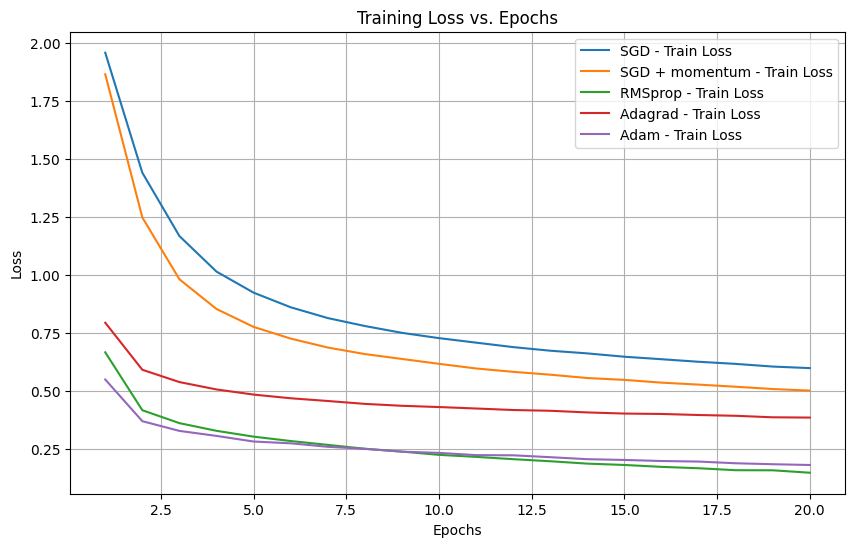

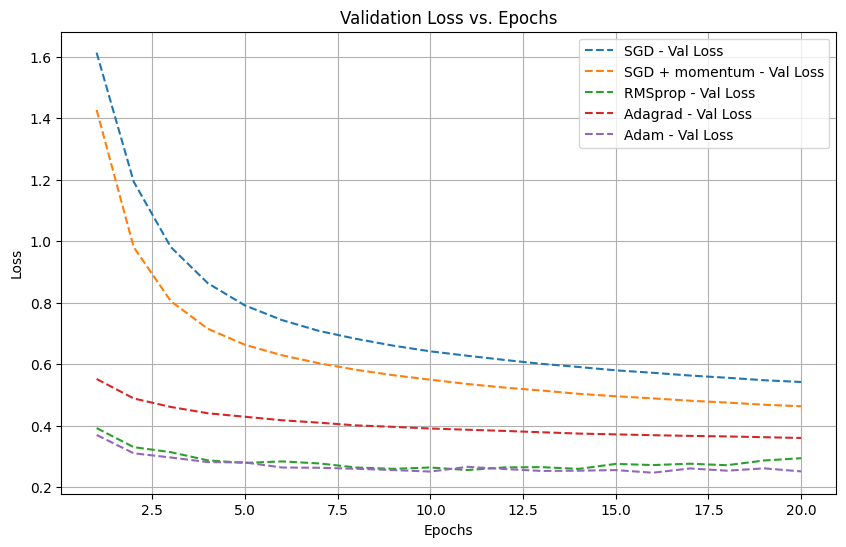

In [13]:

plt.figure(figsize=(10, 6))
for name, (train_losses, _) in results.items():
    plt.plot(range(1, epochs + 1), train_losses, label=f"{name} - Train Loss")

plt.title("Training Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
for name, (_, val_losses) in results.items():
    plt.plot(range(1, epochs + 1), val_losses, label=f"{name} - Val Loss", linestyle='--')

plt.title("Validation Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()